In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
npz = np.load('tfdata.npz')
xtrain = npz['xtrain'].astype(float)
ytrain = npz['ytrain'].astype(float)
xtest = npz['xtest'].astype(float)
ytest = npz['ytest'].astype(float)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Initialization
model = Sequential()

# hidden layers to learn with
model.add(Dense(5, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(3, activation='relu'))

# Output Layer:
model.add(Dense(1))

early_stop = EarlyStopping(monitor = 'val_loss', 
                           mode ='min', 
                           verbose = 1, 
                           patience = 20)

model.compile(optimizer = 'adam', loss = 'mse')

# Train model
model.fit(x = xtrain, 
             y = ytrain,
             validation_data = (xtest, ytest),
             epochs = 1000,
             callbacks=[early_stop])

Epoch 1/1000
38/38 [==============================] - 0s 8ms/step - loss: 1.0508 - val_loss: 0.9015
Epoch 2/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.7308 - val_loss: 0.6145
Epoch 3/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.4918 - val_loss: 0.4366
Epoch 4/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.3411
Epoch 5/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.2901 - val_loss: 0.2698
Epoch 6/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.2298 - val_loss: 0.2120
Epoch 7/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1807 - val_loss: 0.1645
Epoch 8/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1396 - val_loss: 0.1254
Epoch 9/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1059 - val_loss: 0.0945
Epoch 10/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0799 - val_loss: 0.0733

38/38 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 83/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 84/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 85/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 86/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 87/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 88/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 89/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 90/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 91/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0022
Epoc

38/38 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 163/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 164/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 165/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 166/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 167/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 168/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 169/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.0021
Epoch 170/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 171/1000
38/38 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 0.

In [4]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


Text(0, 0.5, 'Predicted')

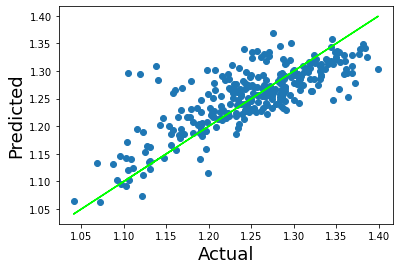

In [5]:
preds_test_nn = model.predict(xtest)
# Our predictions
plt.scatter(ytest,preds_test_nn)
# Perfect predictions
plt.plot(ytest,ytest,'lime')
plt.xlabel("Actual", fontsize = 18)
plt.ylabel("Predicted", fontsize = 18)

In [6]:
import sklearn.metrics as metrics
preds_train = model.predict(xtrain)
d1 = {'Test' : [(metrics.mean_absolute_error(ytest, preds_test_nn)),
                metrics.mean_squared_error(ytest, preds_test_nn),
                np.sqrt(metrics.mean_squared_error(ytest, preds_test_nn))],
     'Train' : [metrics.mean_absolute_error(ytrain, preds_train),
                metrics.mean_squared_error(ytrain, preds_train),
               np.sqrt(metrics.mean_squared_error(ytrain, preds_train))]}
m = pd.DataFrame(d1,['MAE','MSE','RMSE'])
m.style.format("{:.4f}")

,Test,Train
MAE,0.0319,0.0311
MSE,0.0019,0.0017
RMSE,0.0435,0.0407


In [ ]:
# Thank You!